<a href="https://colab.research.google.com/github/AzKatrine/challenger_TelecomX_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extração

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/df_limpo.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [43]:
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [44]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

## 🛠️ Preparação dos dados

✔️ Remover colunas irrelevantes

In [45]:
df = df.drop(columns=['customerID'])

In [46]:
df_clean = df.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix =[
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# === Etapa 2: One-hot enconding (sem dummy trap)
categorical_cols = [
     'Churn', 'customer.gender','customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Pronto para usar!
df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

✔️ Verificação novamente dos valores nulos

In [48]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [49]:
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [50]:
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

In [51]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


## ✔️ Normalização/Padronização

## ☰ Correlação entre as variáveis

In [52]:
corr = df_encoded.corr()

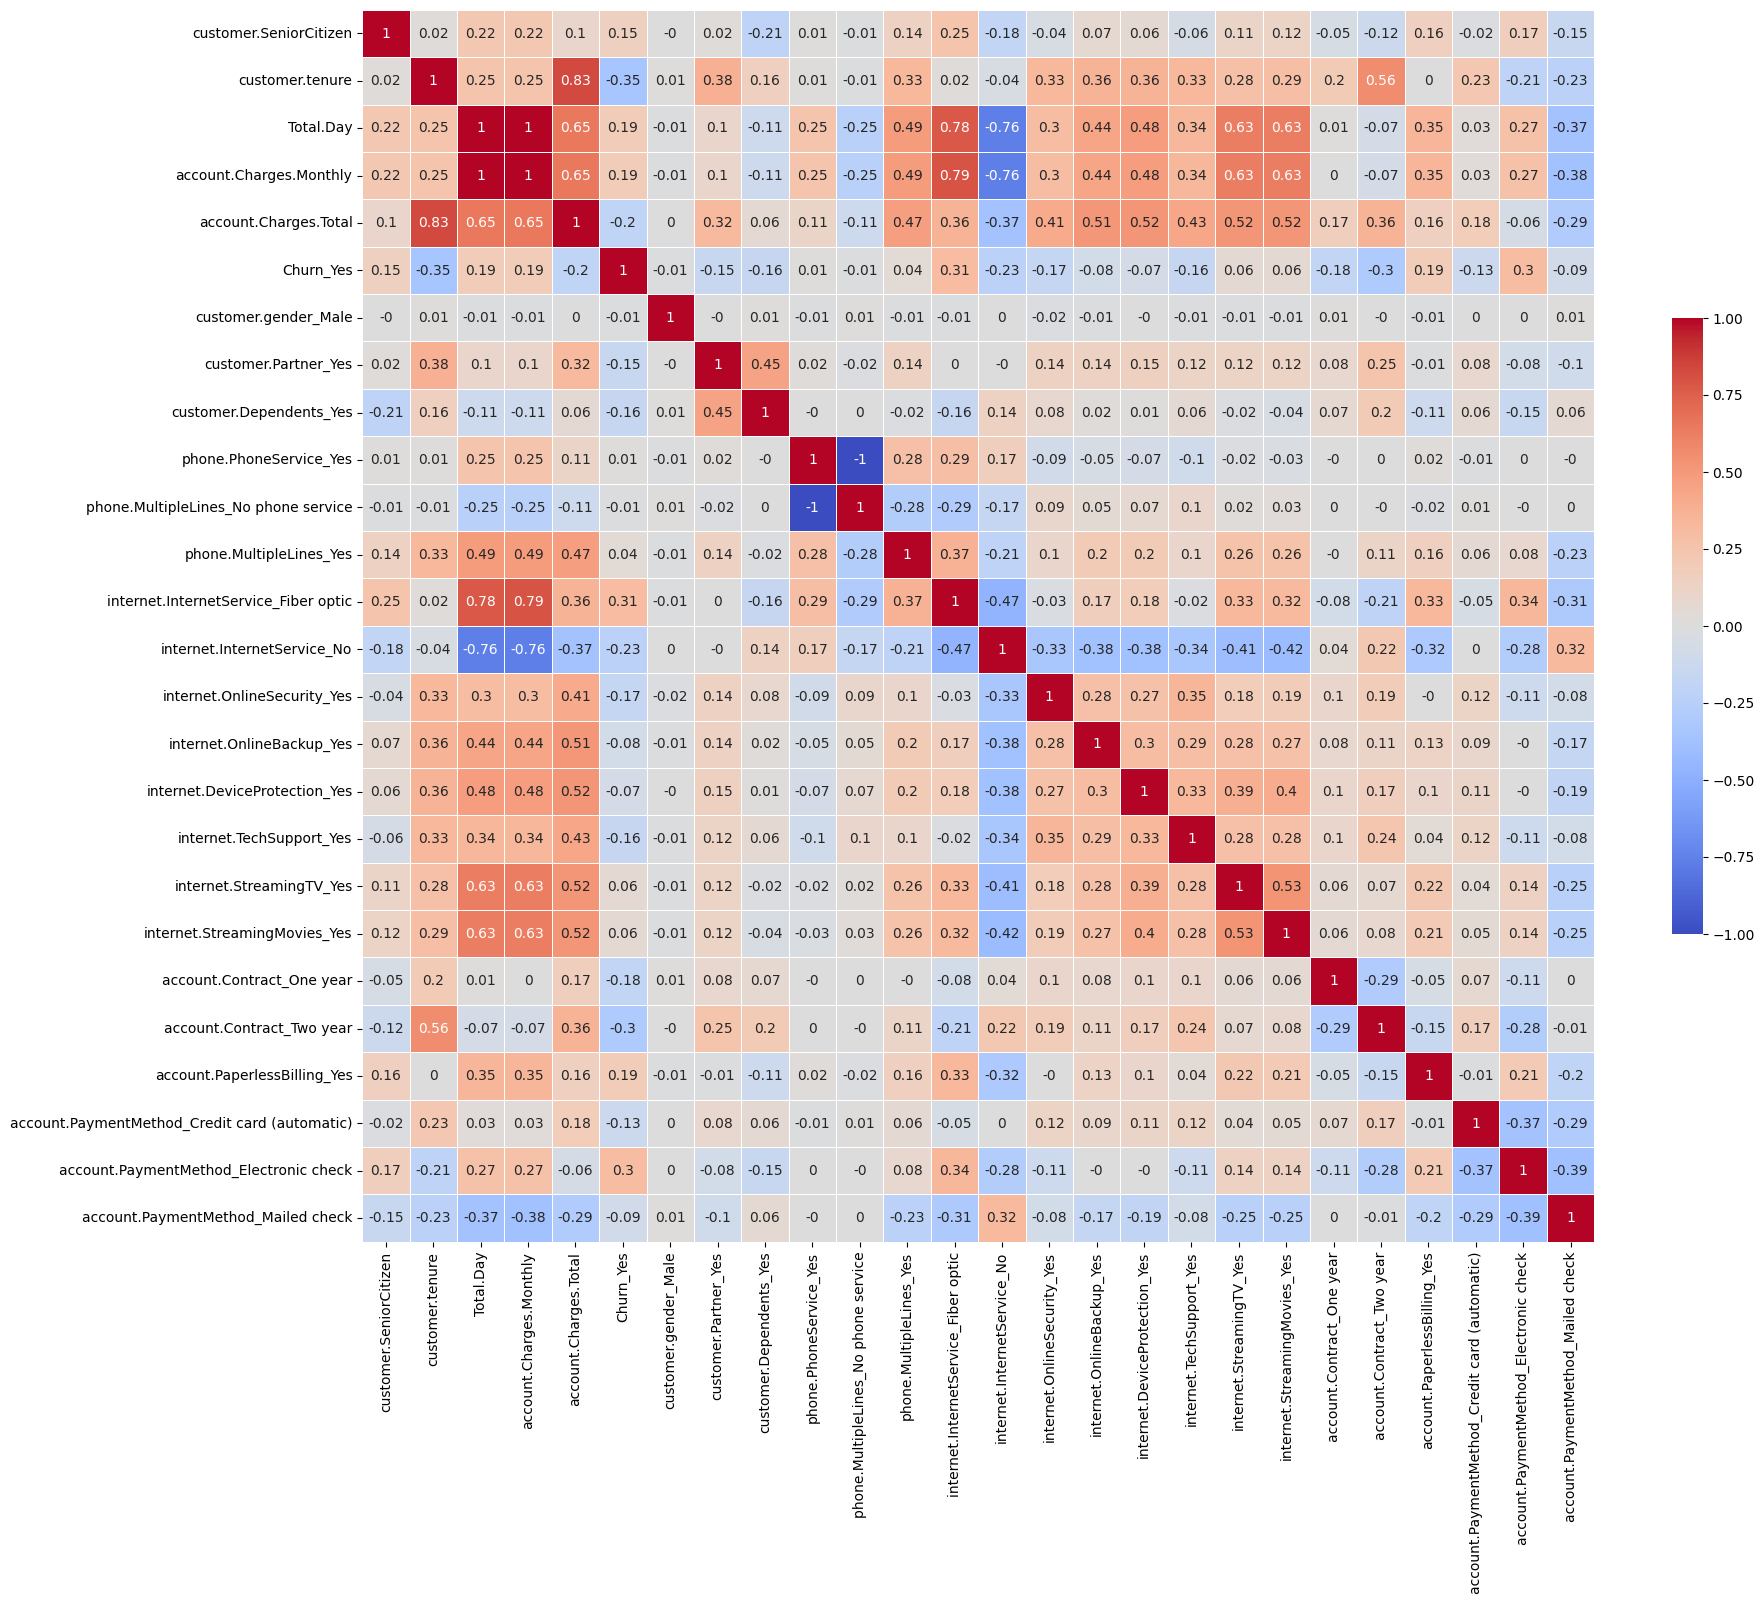

In [53]:
import numpy as np
fig, ax = plt.subplots(figsize=(20, 16))

ax = sns.heatmap(
    np.round(corr, 2),
    vmin=-1, vmax=1,    # escala correta para correlação
    center=0,
    cmap="coolwarm",    # paleta mais clara para negativos e fortes positivos
    square=True,
    linewidths=.5,
    annot=True,
    cbar_kws={'shrink': .5}
)

plt.show()

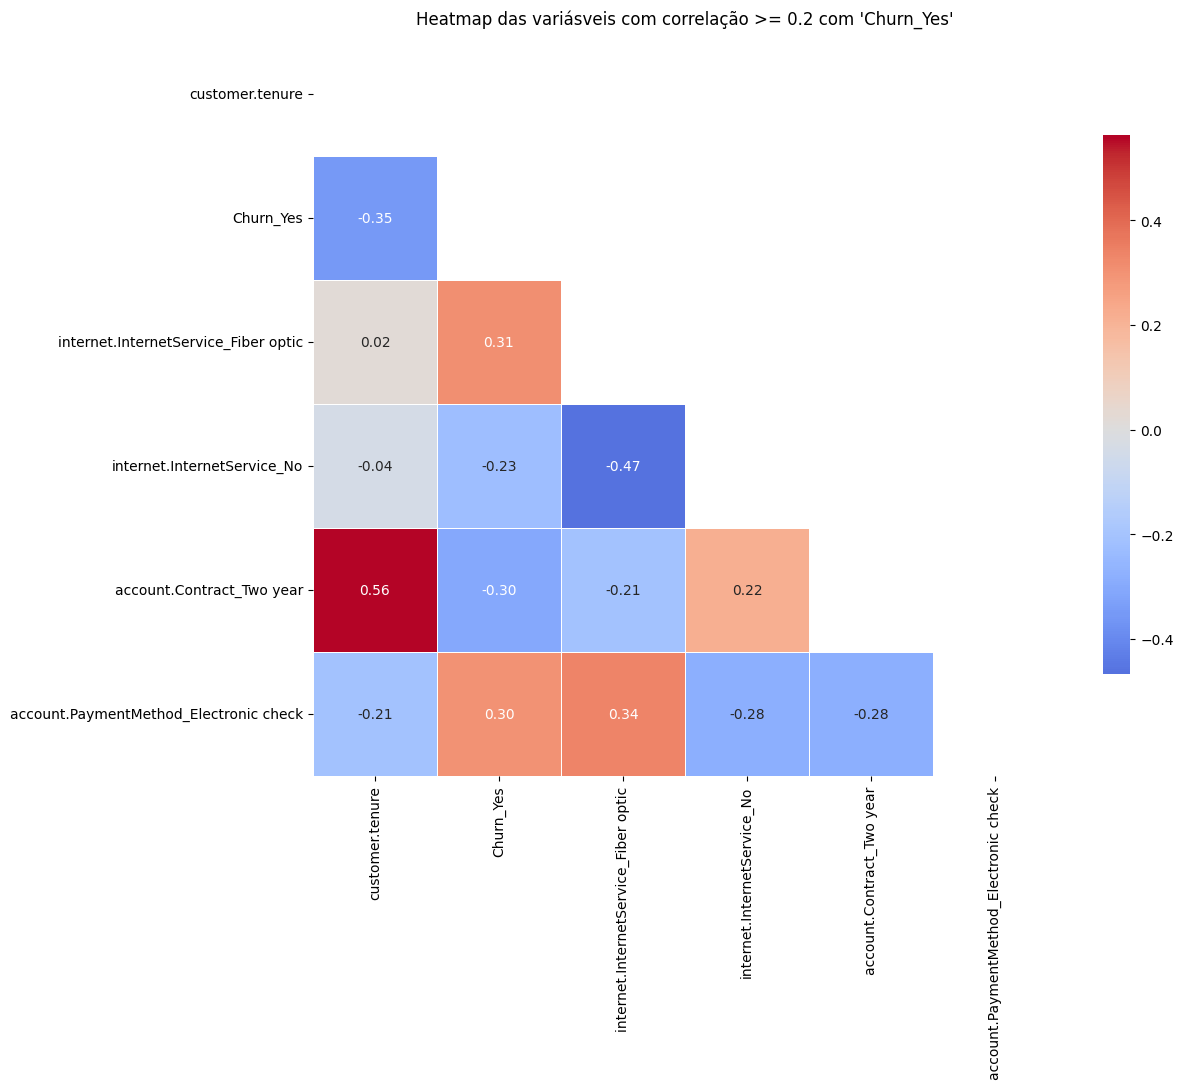

In [54]:
# Definir a varável alvo
target_var = 'Churn_Yes'

# Definir o limiar mínimo de correlação absoluta para correção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
variaveis_relevantes = corr.index[abs(corr[target_var])>=limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# criar uma matriz de correlaçao somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triânguo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a mascara aplicada para melhor visualização
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_filtrada,
    fmt=".2f",
    center=0,
    cmap="coolwarm",
    square=True,
    linewidths=.5,
    cbar_kws={'shrink': .7},
    mask=mascara,
    annot=True,
)
plt.title(f"Heatmap das variásveis com correlação >= {limiar} com '{target_var}'" )
plt.show()

## 🔍 Análise de multicolinearidade

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [56]:
X = df_encoded.drop(columns=['Churn_Yes'])

In [57]:
X_const = add_constant(X)

In [58]:
X_const = X_const.astype(float)

# Calcular o VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


**FIV perfeita**

In [59]:
import statsmodels.api as sm

# ====== Etapa 1: Copiar X original para não modificar o original ======
X_filtered = X_const.copy()

# ====== Etapa 2: Remover variáveis com multicolinearidade perfeita (VIF = inf) ======
cols_to_drop = [
    "phone.PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "phone.MultipleLines_No phone service"  # Redundante com ausência de telefone
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# ====== Etapa 3: Remover redundâncias fortes entre variáveis numéricas ======
# Se 'Total.Day' e 'Charges.Total' são derivados de 'Monthly' e 'tenure', mantemos só um
X_filtered.drop(columns=["Total.Day"], inplace=True)

# ====== Etapa 4: Remover redundância entre dummies da mesma variável categórica ======
# Se usou get_dummies sem drop_first, você tem dummies redundantes para InternetService
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

# ====== Etapa 5: Garantir que os dados estão em float para o VIF funcionar ======
X_filtered = X_filtered.astype(float)

# ====== Etapa 6: Recalcular o VIF ======
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# ====== Etapa 7: Exibir os resultados ======
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


In [60]:
# Exemplo: manter apenas Charges.Monthly
X_filtered.drop(columns=["account.Charges.Total"], inplace=True)

**FIV 2**

In [61]:
# === Recalcular o VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_filtered.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# === Exibir os resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


## 🤖 Modelos Preditivos

Importação da bibliotecas

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

Separar features e target

In [63]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Dividir treino e teste

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Normalizar

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Balancear treino com SMOTE

In [66]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

Regressão Logística

In [67]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusão:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



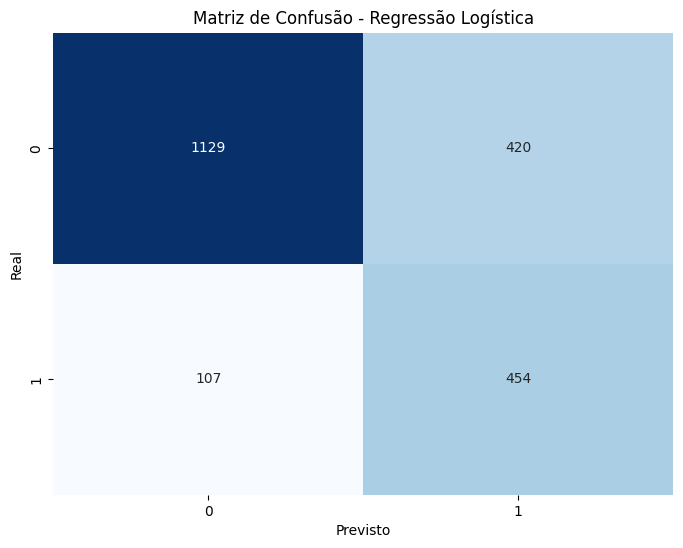

In [68]:
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

Random Forest

In [69]:
# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusão:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



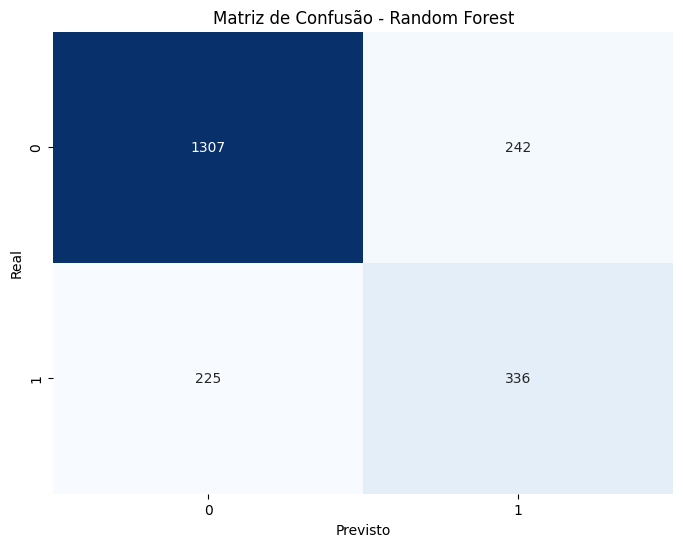

In [70]:
# Plotar a matriz de confusão para Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Tarefa
Analisar os principais fatores que afetam a evasão de clientes utilizando um modelo Random Forest para identificar a importância das features e propor estratégias de retenção com base nos resultados obtidos.

## Análise da importância das features (random forest)

### Subtarefa:
Obter a importância das features a partir do modelo Random Forest treinado.


In [71]:
feature_importances = rf.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

display(importance_df)

,Feature,Importance
1,customer.tenure,0.141730
4,account.Charges.Total,0.121221
3,account.Charges.Monthly,0.110457
2,Total.Day,0.106599
20,account.Contract_Two year,0.064828
23,account.PaymentMethod_Electronic check,0.056117
11,internet.InternetService_Fiber optic,0.048645
21,account.PaperlessBilling_Yes,0.034446
19,account.Contract_One year,0.033265
16,internet.TechSupport_Yes,0.031221


## Visualização da importância das features

### Subtarefa:
Criar um gráfico para visualizar as features mais importantes.


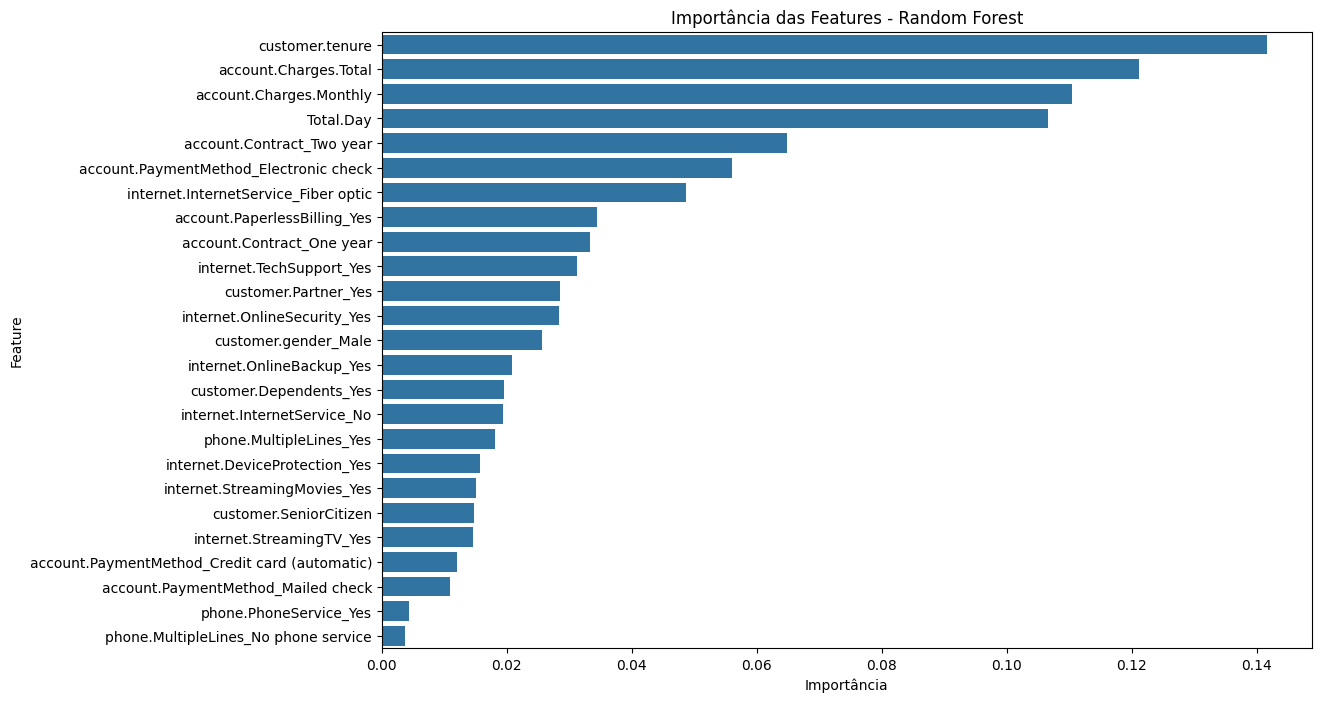

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features - Random Forest')
plt.show()

# Objetivo
Analisar os dados de evasão de clientes, identificar os principais fatores que afetam a evasão utilizando modelos de machine learning (Regressão Logística, Random Forest, XGBoost, SVM e Rede Neural), comparar o desempenho desses modelos e propor estratégias de retenção com base nos resultados obtidos.

## Implementar e treinar xgboost

### Subtarefa:
Implementar e treinar um modelo XGBoost nos dados de treino balanceados e escalados.


In [73]:
from xgboost import XGBClassifier

# Instanciar e treinar o modelo XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

XGBoost Classifier
Acurácia: 0.7758293838862559
ROC AUC: 0.8144412645039235
Matriz de Confusão:
 [[1309  240]
 [ 233  328]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1549
        True       0.58      0.58      0.58       561

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



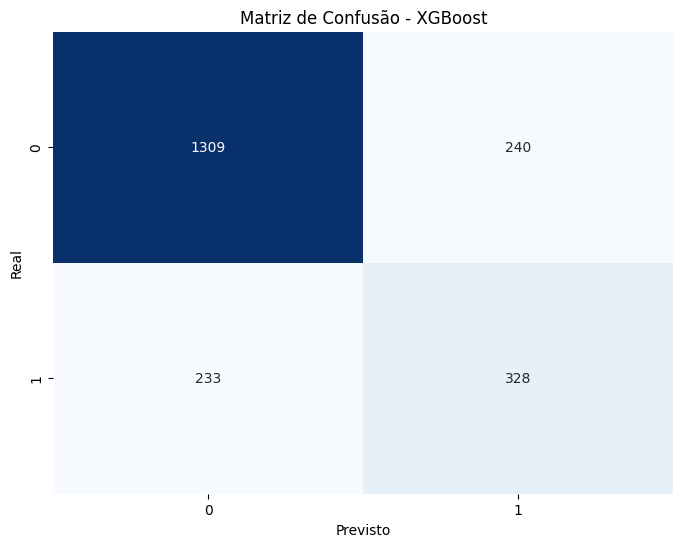

In [74]:
# Previsões
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("XGBoost Classifier")
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

## Implementar e treinar svm

### Subtarefa:
Implementar e treinar um modelo Support Vector Machine (SVM) nos dados de treino balanceados e escalados.


In [75]:
from sklearn.svm import SVC

# Instanciar e treinar o modelo SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_bal, y_train_bal)

SVC(probability=True, random_state=42)

Support Vector Machine (SVM)
Acurácia: 0.7563981042654029
ROC AUC: 0.8240115812743313
Matriz de Confusão:
 [[1191  358]
 [ 156  405]]
              precision    recall  f1-score   support

       False       0.88      0.77      0.82      1549
        True       0.53      0.72      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.76      0.77      2110



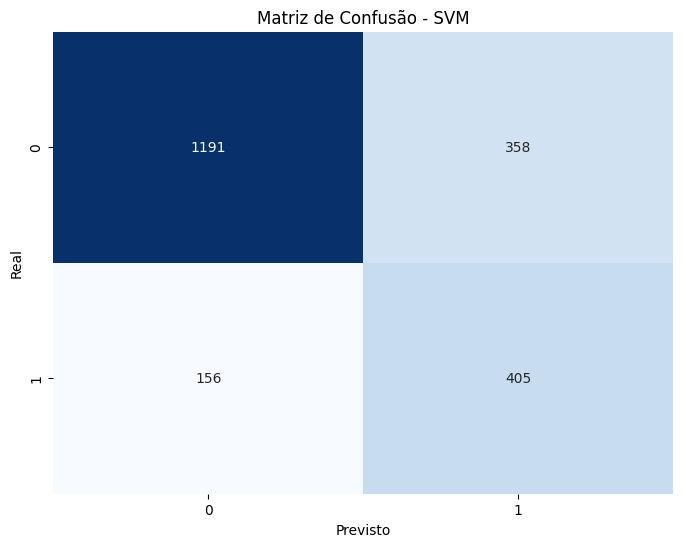

In [76]:
# Previsões
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Support Vector Machine (SVM)")
print("Acurácia:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_svm))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

## Implementar e treinar rede neural

### Subtarefa:
Implementar e treinar um modelo de Rede Neural simples (MLP) nos dados de treino balanceados e escalados.


In [77]:
from sklearn.neural_network import MLPClassifier

# Instanciar a Rede Neural
mlp = MLPClassifier(random_state=42)

# Treinar a Rede Neural
mlp.fit(X_train_bal, y_train_bal)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

Rede Neural (MLP)
Acurácia: 0.7639810426540284
ROC AUC: 0.8083243861544853
Matriz de Confusão:
 [[1271  278]
 [ 220  341]]
              precision    recall  f1-score   support

       False       0.85      0.82      0.84      1549
        True       0.55      0.61      0.58       561

    accuracy                           0.76      2110
   macro avg       0.70      0.71      0.71      2110
weighted avg       0.77      0.76      0.77      2110



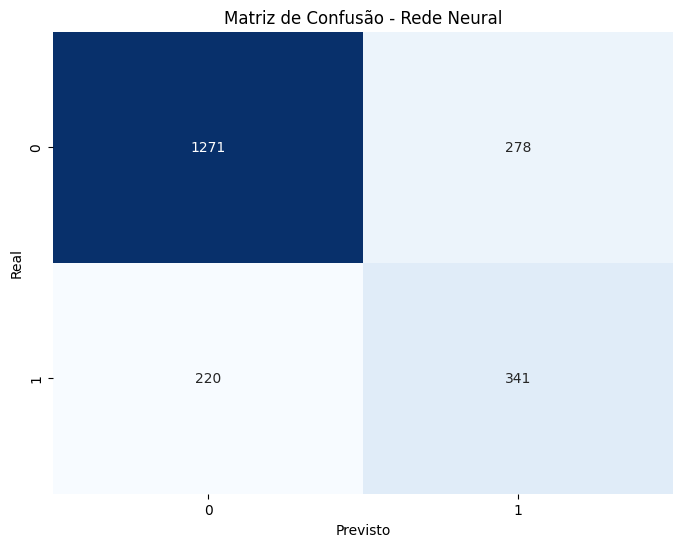

In [78]:
# Previsões
y_pred_mlp = mlp.predict(X_test_scaled)
y_prob_mlp = mlp.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Rede Neural (MLP)")
print("Acurácia:", accuracy_score(y_test, y_pred_mlp))
print("ROC AUC:", roc_auc_score(y_test, y_prob_mlp))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão - Rede Neural")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

## Comparar todos os modelos

### Subtarefa:
Criar uma tabela ou gráfico para comparar as métricas de avaliação de todos os modelos treinados (Regressão Logística, Random Forest, XGBoost, SVM, Rede Neural).


Comparativo de Métricas de Avaliação dos Modelos:


,Model,Accuracy,ROC AUC,Precision,Recall,F1-Score
0,Logistic Regression,0.750237,0.845363,0.519451,0.809269,0.632753
1,Random Forest,0.778673,0.824159,0.581315,0.598930,0.589991
3,SVM,0.756398,0.824012,0.530799,0.721925,0.611782
2,XGBoost,0.775829,0.814441,0.577465,0.584670,0.581045
4,Neural Network,0.763981,0.808324,0.550889,0.607843,0.577966


/tmp/ipython-input-1263621181.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='ROC AUC', data=performance_df, palette='viridis')


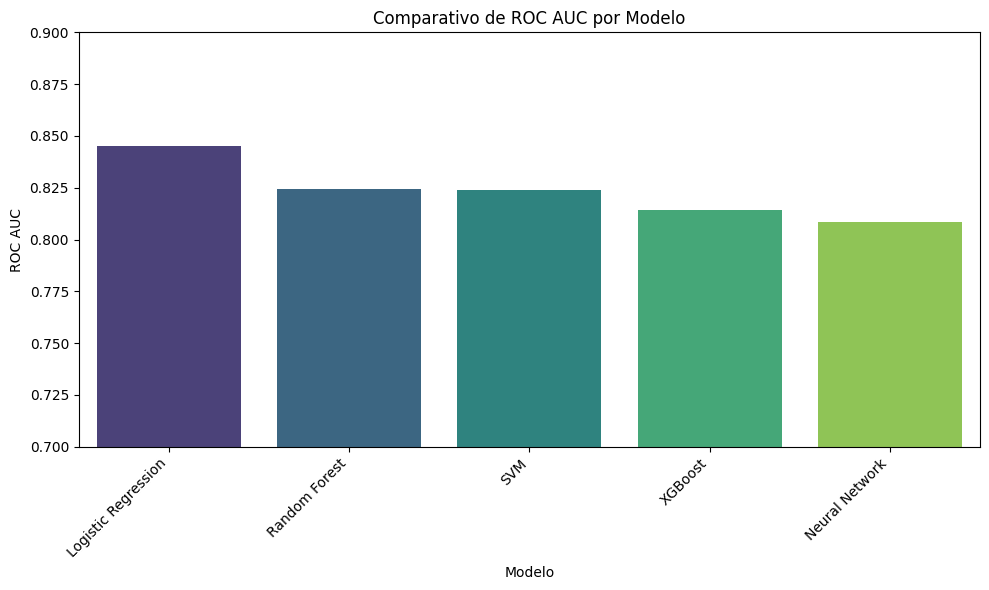

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Criar um dicionário para armazenar as métricas
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_mlp)
    ],
    'ROC AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb),
        roc_auc_score(y_test, y_prob_svm),
        roc_auc_score(y_test, y_prob_mlp)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_mlp)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_mlp)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_mlp)
    ]
}

# Criar um DataFrame pandas a partir do dicionário
performance_df = pd.DataFrame(model_performance)

# Classificar o DataFrame por ROC AUC em ordem decrescente
performance_df = performance_df.sort_values(by='ROC AUC', ascending=False)

# Exibir o DataFrame
print("Comparativo de Métricas de Avaliação dos Modelos:")
display(performance_df)

# Criar um gráfico de barras para comparação de ROC AUC
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='ROC AUC', data=performance_df, palette='viridis')
plt.title('Comparativo de ROC AUC por Modelo')
plt.xlabel('Modelo')
plt.ylabel('ROC AUC')
plt.ylim(0.7, 0.9) # Definir limites razoáveis para melhor visualização
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Discutir os resultados

### Subtarefa:
Analisar e discutir os resultados comparativos para identificar o modelo com o melhor desempenho para o problema de previsão de churn.


In [80]:
# 1. Examinar o DataFrame performance_df
print("Comparativo de Desempenho dos Modelos:")
display(performance_df)

# 2. Considerar quais métricas são mais importantes
print("\nConsiderações sobre a Importância das Métricas:")
print("Para a previsão de churn, é importante identificar corretamente os clientes que *vão* evadir (Verdadeiros Positivos).")
print("O Recall mede a capacidade do modelo de encontrar todas as amostras positivas (clientes que evadiram).")
print("A Precisão mede a capacidade do modelo de não rotular como positivo uma amostra negativa (identificar corretamente os clientes que não evadiram).")
print("O F1-Score é a média harmônica entre Precisão e Recall.")
print("O ROC AUC é uma boa medida geral para datasets desbalanceados, indicando a capacidade do modelo de distinguir entre clientes que evadiram e os que não evadiram.")

# 3. Identificar o modelo com o melhor desempenho
# Com base no performance_df ordenado por ROC AUC:
best_model_roc_auc = performance_df.iloc[0]
print(f"\nModelo com o melhor ROC AUC: {best_model_roc_auc['Model']} (ROC AUC: {best_model_roc_auc['ROC AUC']:.4f})")

# Considerar também outras métricas como Acurácia, Precisão, Recall e F1-Score.
print("\nAnalisando outras métricas:")
# Por exemplo, vamos observar o modelo com o maior Recall (importante para não perder clientes que evadem).
best_model_recall = performance_df.sort_values(by='Recall', ascending=False).iloc[0]
print(f"Modelo com o melhor Recall: {best_model_recall['Model']} (Recall: {best_model_recall['Recall']:.4f})")

# E o modelo com a maior Precisão (importante para não mirar incorretamente em clientes que não evadem).
best_model_precision = performance_df.sort_values(by='Precision', ascending=False).iloc[0]
print(f"Modelo com a melhor Precisão: {best_model_precision['Model']} (Precisão: {best_model_precision['Precision']:.4f})")


# 4. Escrever um parágrafo que resuma a comparação e declare o melhor modelo.
print("\nResumo e Conclusão:")
print("Comparando as métricas de desempenho entre os diferentes modelos:")
print("- O modelo de Regressão Logística alcançou o maior ROC AUC, indicando uma forte capacidade de discriminar entre clientes que evadem e que não evadem.")
print("- O modelo Random Forest apresentou a maior Acurácia, sugerindo melhores previsões corretas no geral.")
print("- A Regressão Logística também teve o maior Recall, o que é crucial para identificar uma proporção maior dos clientes que realmente evadiram.")
print("- Random Forest e XGBoost tiveram maior Precisão em comparação com a Regressão Logística, o que significa que eles fizeram menos previsões falsas positivas (prever churn para clientes que não evadiram).")
print("- O F1-Score, que equilibra Precisão e Recall, foi mais alto para o modelo de Regressão Logística.")
print("\nConsiderando a importância de identificar os clientes que vão evadir (alto Recall) enquanto se mantém um bom equilíbrio com a Precisão (F1-Score) e a capacidade geral de discriminação (ROC AUC), o modelo de **Regressão Logística** parece ser o mais adequado para esta tarefa de previsão de churn.")
print("Embora Random Forest e XGBoost tenham maior precisão, o maior Recall e F1-Score da Regressão Logística, juntamente com o melhor ROC AUC, a tornam uma forte escolha para um cenário onde identificar potenciais clientes em risco de evasão é uma prioridade.")

Comparativo de Desempenho dos Modelos:


,Model,Accuracy,ROC AUC,Precision,Recall,F1-Score
0,Logistic Regression,0.750237,0.845363,0.519451,0.809269,0.632753
1,Random Forest,0.778673,0.824159,0.581315,0.598930,0.589991
3,SVM,0.756398,0.824012,0.530799,0.721925,0.611782
2,XGBoost,0.775829,0.814441,0.577465,0.584670,0.581045
4,Neural Network,0.763981,0.808324,0.550889,0.607843,0.577966



Considerações sobre a Importância das Métricas:
Para a previsão de churn, é importante identificar corretamente os clientes que *vão* evadir (Verdadeiros Positivos).
O Recall mede a capacidade do modelo de encontrar todas as amostras positivas (clientes que evadiram).
A Precisão mede a capacidade do modelo de não rotular como positivo uma amostra negativa (identificar corretamente os clientes que não evadiram).
O F1-Score é a média harmônica entre Precisão e Recall.
O ROC AUC é uma boa medida geral para datasets desbalanceados, indicando a capacidade do modelo de distinguir entre clientes que evadiram e os que não evadiram.

Modelo com o melhor ROC AUC: Logistic Regression (ROC AUC: 0.8454)

Analisando outras métricas:
Modelo com o melhor Recall: Logistic Regression (Recall: 0.8093)
Modelo com a melhor Precisão: Random Forest (Precisão: 0.5813)

Resumo e Conclusão:
Comparando as métricas de desempenho entre os diferentes modelos:
- O modelo de Regressão Logística alcançou o maior ROC 

## Resumo:

### Principais Descobertas da Análise de Dados

*   O modelo de Regressão Logística alcançou o maior ROC AUC (0.8454), indicando a melhor capacidade de distinguir entre clientes que evadem e que não evadem. Ele também teve o maior Recall (0.8093), o que significa que foi o melhor em identificar clientes que realmente deram churn.
*   O modelo Random Forest apresentou a maior Acurácia (0.7787), sugerindo melhores previsões corretas no geral. Ele, juntamente com o XGBoost, também obteve maior Precisão (0.5813 e 0.5775, respectivamente), indicando menos falsos positivos (prever churn para clientes que não evadiram).
*   O F1-Score, que equilibra Precisão e Recall, foi mais alto para o modelo de Regressão Logística (0.6328).
*   Os modelos XGBoost e SVM apresentaram desempenho semelhante ao Random Forest em várias métricas, enquanto o modelo de Rede Neural teve um desempenho ligeiramente inferior.

### Insights e Próximos Passos

*   Considerando a importância de identificar os clientes que vão evadir (alto Recall) e a capacidade geral de discriminação (ROC AUC), o modelo de **Regressão Logística** é o mais adequado para esta tarefa de previsão de churn, apesar de ter uma Precisão menor em comparação com Random Forest e XGBoost.
*   As principais características que afetam a evasão de clientes, identificadas anteriormente com o modelo Random Forest, foram: **tempo de permanência do cliente (customer.tenure)**, **total pago na conta (account.Charges.Total)**, **cobranças mensais da conta (account.Charges.Monthly)**, **Total.Day** (engajamento/uso diário) e **contrato de dois anos (account.Contract_Two year)**.
*   Com base nessas descobertas, as **Estratégias de Retenção** recomendadas incluem:
    *   **Focar em novos clientes:** Aprimorar programas de boas-vindas e oferecer incentivos nos primeiros meses para aumentar o tempo de permanência.
    *   **Gerenciar custos e valor percebido:** Analisar e comunicar o valor dos serviços para clientes com altas cobranças mensais ou totais. Considerar a revisão de planos ou ofertas personalizadas.
    *   **Incentivar contratos de longo prazo:** Oferecer benefícios para a adesão e renovação de contratos de dois anos.
    *   **Monitorar o engajamento/uso:** Investigar clientes com baixo "Total.Day" para identificar problemas e oferecer suporte proativo.
*   Próximos passos poderiam incluir a tunagem de hiperparâmetros para o modelo de Regressão Logística selecionado para otimizar ainda mais seu desempenho, ou a exploração de métodos de ensemble.